Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).
df_ovnis = pd.read_csv("df_OVNI_preparado.csv", index_col=[0])

#Cria um novo dataframe com os dados da cidade de Phoenix
df_ovnis = df_ovnis[df_ovnis['City']=='Phoenix']

#agrupa por data
df_views = df_ovnis
df_views['Views'] = df_views.groupby('Sight_Date')['Sight_Date'].transform('count')

#Excluir as colunas cujo os dados não são necessários
df_views = df_views.drop(columns=["Sight_Month"])
df_views = df_views.drop(columns=["Sight_Day"])
df_views = df_views.drop(columns=["Sight_Weekday"])
df_views = df_views.drop(columns=["Shape"])
df_views = df_views.drop(columns=["State"])
df_views = df_views.drop(columns=["City"])
df_views = df_views.drop(columns=["Sight_Time"])
df_views.sort_values(by='Sight_Date')

,Sight_Date,Views
335,1999-06-12,1
970,2001-11-12,1
1249,2003-05-31,1
1781,2005-02-21,1
1793,2005-03-20,1
...,...,...
70762,2017-06-15,2
71348,2017-07-06,1
71057,2017-07-26,1
71857,2017-08-04,1


Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
Exemplo com o ano de 2017

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


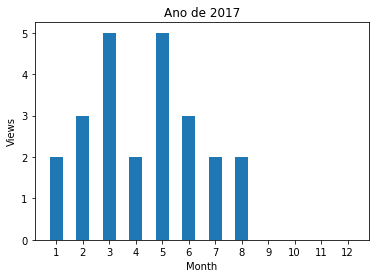

In [ ]:
#Atribui o daframe a uma outro para manipulção mais livre
df_mes = df_ovnis
#Define o ano que quer ser visto no grafico
ano = 2017

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_mes['Sight_Date'] = pd.to_datetime(df_mes['Sight_Date'])
#Separa o ano em uma coluna propria
df_mes['Sight_Year'] = df_mes['Sight_Date'].dt.strftime('%Y')
#transforma o ano em string
df_mes = df_mes[df_ovnis['Sight_Year'] == str(ano)]
#Conta quantas visualizacoes cada mes tem
df_mes["Views"] = df_mes.groupby('Sight_Month')['Sight_Month'].transform('count')

#cria um vetor com todos os meses do ano
mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#cria um vetor vazio que tera as views de cada mes
views = []

#no primeiro for ele vai rodar todos os 12 meses
for j in mes:
  #flag para nao duplicar o numero de views de meses repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_mes.itertuples():
    if(df_mes.Sight_Month[i.Index] == j and flag == 0):
      #atribui o numero do mes correspondente (representado pelo j)
      views.append(df_mes.Views[i.Index])
      flag = 1

#preenche os meses cujo n tiveram observacoes registradas com o valor zero
if(len(views) < 12):
  meses_sem_views = 12 - len(views)
  for i in range(meses_sem_views):
    views.append(0)

#----PLOTANDO O GRAFICO-----

#cria distancia entre as barras
x1 =  np.arange(len(views))

# Plota as barras
plt.bar(x1, views, width=0.5, label = 'Produto A')

# coloca o nome dos meses como label do eixo x
plt.xticks([x for x in range(len(views))], mes)

plt.title("Ano de "+ str(ano))
plt.xlabel('Month')
plt.ylabel('Views')
plt.show()

Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos).

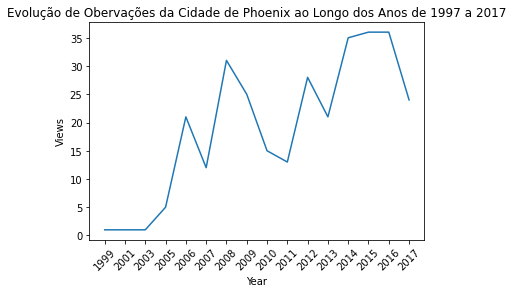

In [ ]:
#Atribui o daframe a uma outro para manipulção mais livre#Atribui o daframe a uma outro para manipulção mais livre
df_anos = df_ovnis

#Array vazio que tera os anos de 1997 a 2017
anos = []
#Array vazio que tera as views correspondennte ao periodo pedido
views = []
#Anos que aparecerao no grafico
anos_grafico = []

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_anos['Sight_Date'] = pd.to_datetime(df_anos['Sight_Date'])
#Separa o ano em uma coluna propria
df_anos['Sight_Year'] = df_anos['Sight_Date'].dt.strftime('%Y')
#Conta quantas visualizacoes cada ano tem
df_anos["Views"] = df_anos.groupby('Sight_Year')['Sight_Year'].transform('count')

#intera os anos de 1997 a 2017 no array 'anos'
for i in range(1997, 2018):
  anos.append(i)

#no primeiro for ele vai rodar todos os os anos que o array rececbeu
for j in anos:
  #flag para nao duplicar o numero de views de anos repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_anos.itertuples():
    if(df_anos.Sight_Year[i.Index] == str(j) and flag == 0):
      #atribui o ano correspondente a view adicionada
      anos_grafico.append(str(j))
      #atribui o numero do ano correspondente (representado pelo j)
      views.append(df_anos.Views[i.Index])
      flag = 1

#Atribui o 'anos_grafico' como anos do eixo x e as views no eixo y
plt.plot(anos_grafico, views)
plt.xlabel('Year')
plt.ylabel('Views')
plt.title("Evolução de Obervações da Cidade de Phoenix ao Longo dos Anos de 1997 a 2017")
plt.xticks(rotation=45)

plt.show()

Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal, não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até ele para treinamento; e do índice seguinte até o final para teste).

In [ ]:
# Transforma o 'Sight_date' de df_views em tipo Date. 
df_views['Sight_Date'] = pd.to_datetime(df_views['Sight_Date'])
# Definimos o 'Sight_Date' como o index para ficar saltado no Dataframe.
df_views.set_index('Sight_Date', inplace = True)
df_views

,Views
Sight_Date,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1
...,...
2017-06-07,1
2017-07-26,1
2017-07-06,1


In [ ]:
df_views.head()

,Views
Sight_Date,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1


In [ ]:
# Isso separa os conjunto df_views no conjunto de treinamento (df_train) e no conjunto de teste (df_test).
# O conjunto df_train possui 70% dos dados do conjunto df_views, enquanto o df_test possui 30% dos dados.
df_train, df_test = df_views.iloc[:213, :], df_views.iloc[213:, :]

In [ ]:
df_train.shape

(213, 1)

In [ ]:
df_train.head()

,Views
Sight_Date,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1


In [ ]:
df_test.shape

(92, 1)

In [ ]:
df_test.head()

,Views
Sight_Date,
2015-01-06,2
2015-02-18,1
2015-02-11,2
2015-02-11,2
2015-03-20,1


Utilizando o pacote statsmodels, vamos testar uma família de métodos apropriados para lidar com previsão de séries temporais chamados conjuntamente de SARIMAX (Links para um site externo.), ou seja, utilize a função SARIMAX para criar um modelo;

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_views.drop('Views',axis=1), df_views['Views'], test_size=0.3, random_state=0, shuffle=False)
x_train.shape, y_train.shape

((213, 0), (213,))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
% matplotlib inline
sarimax_model = SARIMAX(df_train, order=(1,0,0))
#sarimax_model = SARIMAX(df_ovnis['Views'], freq='MS', order=(1,1,1), seasonal_order=(1,1,1,12),exog=df_ovnis['Views']).fit(x_train, y_train)
#sarimax_model = sm.tsa.statespace.SARIMAX(df_train, order=(1,0,0))
#res = sarimax_model(disp=False)
#res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
res = sarimax_model.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Views   No. Observations:                  213
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -191.189
Date:                Wed, 28 Oct 2020   AIC                            386.378
Time:                        23:36:52   BIC                            393.101
Sample:                             0   HQIC                           389.095
                                - 213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9235      0.013     69.757      0.000       0.898       0.949
sigma2         0.3493      0.008     42.421      0.000       0.333       0.365
===================================================================================
Ljung-Box (Q):                       48.28   Jarque-Bera (JB):             15669.28
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A última etapa é realizar uma previsão utilizando o melhor modelo:
Utilizando a função forecast sobre o modelo ajustado, faça uma previsão apropriada para a quantidade de dias que existem no seu conjunto de teste;

In [ ]:
df_forecast = res.forecast(92)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
df_forecast

213    1.846921
214    1.705559
215    1.575017
216    1.454466
217    1.343143
         ...   
300    0.001811
301    0.001672
302    0.001544
303    0.001426
304    0.001317
Length: 92, dtype: float64

In [ ]:
df_forecast = pd.DataFrame(res.forecast(92), columns=['Views'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
df_forecast

,Views
213,1.846921
214,1.705559
215,1.575017
216,1.454466
217,1.343143
...,...
300,0.001811
301,0.001672
302,0.001544
303,0.001426


In [ ]:
df_test

,Views
Sight_Date,
2015-01-06,2
2015-02-18,1
2015-02-11,2
2015-02-11,2
2015-03-20,1
...,...
2017-06-07,1
2017-07-26,1
2017-07-06,1


In [ ]:
array_forecast = []
array_test = []
diferenca = []

for i in df_forecast.itertuples():
  array_forecast.append(float(df_forecast.Views[i.Index]))

for index, row in df_test.iterrows():
  teste = str(row["Views"])
  array_test.append(float(teste))

for i in range(92):
  diferenca.append(array_forecast[i] - array_test[i])

print(diferenca)

[-0.15307858398886953, 0.7055593584602797, -0.4249829472907525, -0.5455336373842796, 0.3431425369913923, 0.2403393581624622, 0.14540466185587575, 0.057736199990302106, -0.023222179873839455, -0.09798406266216309, -0.16702372387369757, -0.2307791382965656, -0.2896547584386955, -0.34402408029941345, -0.39423201275869457, -0.44059706561503786, -0.4834133701524721, -0.522952545054793, -0.5594654195040463, -0.5931836243942719, -0.6243210617548763, -0.6530752617053791, -0.679628635549804, -1.704149632960113, -1.7267938105896397, -4.747704818895606, -4.767015313430944, -4.784847796386485, -4.801315393722106, -4.816522572816809, -0.8305658051903708, -0.8435341785007469, -0.8555099616996273, -0.8665691269313867, -0.8767818314862575, -0.8862128628651504, -0.8949220497795254, -0.902964641693627, -0.9103916593168231, -0.9172502182695096, -0.9235838279758553, -0.9294326676795083, -1.9348338413332546, -1.9398216129796044, -1.9444276241155125, -1.9486810944201598, -0.9526090071191701, -0.956236280161

In [ ]:
# O Erro Médio é calculado quando calculamos o valor absoluto 
# da diferença entre o forecast e df_teste, depois pegamos a media desse vetor 
# resultante.
print("Erro Médio:")
np.mean(np.abs(diferenca))

Erro Médio:


1.1942378489196437

In [ ]:
print("Desvio Padrão:")
# O metódo que calcula o desvio padrão da amostra é .std()
# ddof modifica o divisor da sum dos quadrados das amostras-menos-média. 
# O divisor é N - ddof , onde o padrão ddof é 0 como você pode ver no seu
# resultado.
np.std(diferenca, ddof=1)